# Projet 10 : Détectez des faux billets avec R ou Python

Dans le cadre de ce projet nous incarnons un Data Analyst travaillant pour l'ONCFM, notre objectif est de réaliser un algorithme capable de faire la différence entre les vrais et les faux billets à partir de ses caractéristiques géométriques.

# Partie 1

L'objectif de cette partie est l'importation, l'analyse et le nettoyage du jeu de données. Dans un premier temps on va chercher à identifier les éventuels problèmes de notre jeu de données et à les corriger. Puis on menera une analyse exploratoire sur notre jeu de données. Enfin on terminera par une régression linéaire pour combler les données manquantes.

# Sommaire

* [Importation des librairies](#Importation_des_librairies)
* [Importation et traitement des données](#Importation_des_données)
* [Analyse univariée](#Analyse_univariée)
    * [Diagonal](#Diagonal)
    * [Length](#Length)
    * [Height left](#Height_left)
    * [Height right](#Height_right)
    * [Margin low](#Margin_low)
    * [Margin up](#Margin_up)
* [Analyse bivariée](#Analyse_bivariée)
* [Régression linéaire simple](#Régression_linéaire)
* [Régression linéaire multiple](#Régression_linéaire_multiple)

# Importations des libraires<a class="anchor" id="Importation_des_librairies"></a>

In [1]:
# importation des librairies
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.formula.api as smf

#Fonctions
from functions import *

# Importation et traitement des données<a class="anchor" id="Importation_des_données"></a>

Nous avons a notre disposition un jeu de données contenant les données géométriques de 1000 vrais billets ainsi que de 500 faux billets. Pour chaque billet nous avons son authenticité, sa diagonale, sa hauteur gauche, sa hauteur droite, sa marge inférieure, sa marge supérieure et sa longueur.

In [2]:
# importation des données
billets_data = pd.read_csv("billets.csv", sep=";")

In [3]:
# affiche les Dtypes des données
print("Dtypes :")
print(billets_data.dtypes)

Dtypes :
is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [4]:
# Affiche les rows qui contiennent des NaN
is_NaN = billets_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = billets_data[row_has_NaN]
print(rows_with_NaN)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53 

Parmi nos données nous avons 37 billets pour lesquels la valeur de marge inférieure est manquante. Soit 2,46% de lignes incomplètes.

# Analyse univariée<a class="anchor" id="Analyse_univariée"></a>

## Diagonal<a class="anchor" id="Diagonal"></a>

Moyenne = 171.9584399999998
Médiane = 171.96
Mode = 171.99
Ecart-type = 0.3051951219165014
Valeur minimale = 171.04
Valeur maximale = 173.01
1er quartile = 171.75
3ème quartile = 172.17
Nombre de valeurs non-nulles = 1500
Valeurs aberrantes :
1277    173.01
828     172.92
842     172.89
1022    172.89
Name: diagonal, dtype: float64
1388    171.05
729     171.04
1142    171.04
Name: diagonal, dtype: float64


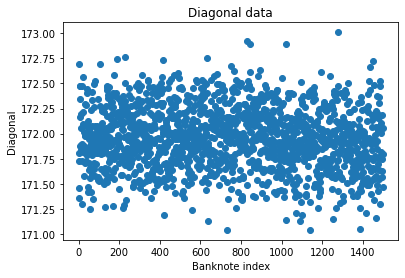

In [5]:
# Analyse des données de diagonale
analyse_u(data=billets_data["diagonal"])
plt.title("Diagonal data")
plt.ylabel("Diagonal")
plt.xlabel("Banknote index")
plt.show()

## Length<a class="anchor" id="Length"></a>

Moyenne = 112.67850000000006
Médiane = 112.96
Mode = 113.38
Ecart-type = 0.8727298101633162
Valeur minimale = 109.49
Valeur maximale = 114.44
1er quartile = 112.03
3ème quartile = 113.34
Nombre de valeurs non-nulles = 1500
Valeurs aberrantes :
Series([], Name: length, dtype: float64)
1355    109.97
1453    109.93
1082    109.49
Name: length, dtype: float64


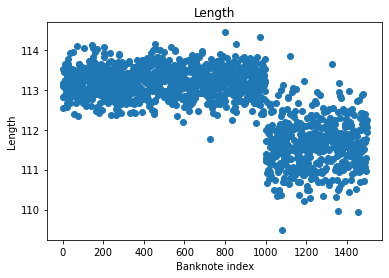

In [6]:
# Analyse des données de longueur
analyse_u(data=billets_data["length"])
plt.title("Length")
plt.ylabel("Length")
plt.xlabel("Banknote index")
plt.show()

Moyenne = 113.20243000000004
Médiane = 113.205
Mode = 113.38
Ecart-type = 0.3595520445954557
Valeur minimale = 111.76
Valeur maximale = 114.44
1er quartile = 112.95
3ème quartile = 113.46
Nombre de valeurs non-nulles = 1000
Valeurs aberrantes :
798    114.44
974    114.32
Name: length, dtype: float64
591    112.18
951    112.17
728    111.76
Name: length, dtype: float64
pvalue = 0.2398011645378072
La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité


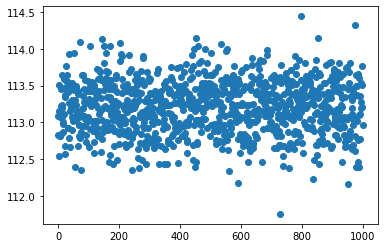

In [7]:
# Isolation des données de vrais billets
length_true = billets_data["length"].loc[billets_data["is_genuine"]==True]
analyse_u(data=length_true)
# Test de Kolmogorov Smirnov pour tester la normalité
length_true_cr = length_true
length_true_cr -= np.mean(length_true_cr)
length_true_cr /= np.std(length_true_cr)
statistic, pvalue = st.kstest(length_true_cr, 'norm')
print("pvalue =", pvalue)
print("La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité")

Moyenne = 111.63064000000008
Médiane = 111.63
Mode = 111.04
Ecart-type = 0.6155434817751804
Valeur minimale = 109.49
Valeur maximale = 113.85
1er quartile = 111.2
3ème quartile = 112.03
Nombre de valeurs non-nulles = 500
Valeurs aberrantes :
1122    113.85
1325    113.64
Name: length, dtype: float64
1453    109.93
1082    109.49
Name: length, dtype: float64
pvalue = 0.8597581351092659
La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité


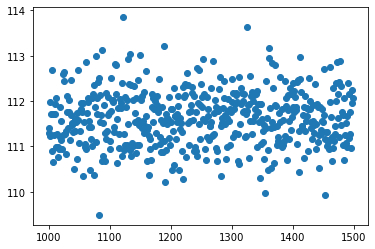

In [8]:
# Isolation des données de faux billets
length_false = billets_data["length"].loc[billets_data["is_genuine"]==False]
analyse_u(data=length_false)
# Test de Kolmogorov Smirnov pour tester la normalité
length_false_cr = length_false
length_false_cr -= np.mean(length_false_cr)
length_false_cr /= np.std(length_false_cr)
statistic, pvalue = st.kstest(length_false_cr, 'norm')
print("pvalue =", pvalue)
print("La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité")

Ttest

Hypothèse H0 : Les moyennes des différents groupes sont égales.

In [9]:
# Réalise le test ttest entre vrais et faux billets
Fstat, pvalue = st.ttest_ind(length_true, length_false)
print("Pvalue : ", pvalue)
pvalue<=0.05

Pvalue :  0.9999999999994185


False

La Pvalue est supérieure à 0.05, on admet donc l'hypothèse H0.

## Height left<a class="anchor" id="Height_left"></a>

Moyenne = 104.02953333333326
Médiane = 104.04
Mode = 103.95
Ecart-type = 0.2994616843980283
Valeur minimale = 103.14
Valeur maximale = 104.88
1er quartile = 103.82
3ème quartile = 104.23
Nombre de valeurs non-nulles = 1500
Valeurs aberrantes :
1090    104.88
0       104.86
1150    104.86
1382    104.85
Name: height_left, dtype: float64
224    103.20
292    103.14
Name: height_left, dtype: float64


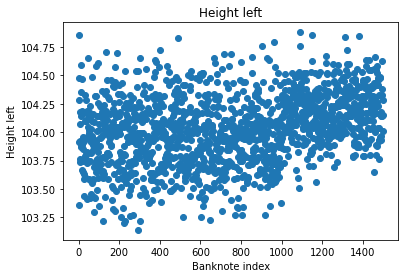

In [10]:
# Analyse des données de hauteur gauche
analyse_u(data=billets_data["height_left"])
plt.title("Height left")
plt.ylabel("Height left")
plt.xlabel("Banknote index")
plt.show()

## Height right<a class="anchor" id="Height_right"></a>

Moyenne = 103.92030666666666
Médiane = 103.92
Mode = 103.76
Ecart-type = 0.325627079062283
Valeur minimale = 102.82
Valeur maximale = 104.95
1er quartile = 103.71
3ème quartile = 104.15
Nombre de valeurs non-nulles = 1500
Valeurs aberrantes :
0       104.95
1484    104.95
1199    104.87
1321    104.86
1331    104.83
Name: height_right, dtype: float64
761    103.04
77     103.03
176    102.97
193    102.95
522    102.91
251    102.82
Name: height_right, dtype: float64


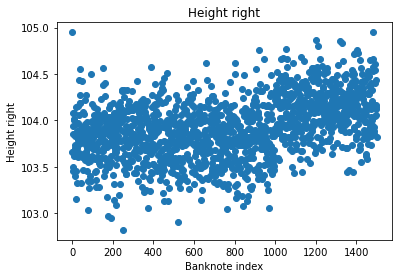

In [11]:
# Analyse des données de hauteur droite
analyse_u(data=billets_data["height_right"])
plt.title("Height right")
plt.ylabel("Height right")
plt.xlabel("Banknote index")
plt.show()

## Margin low<a class="anchor" id="Margin_low"></a>

Moyenne = 4.485967190704034
Médiane = 4.31
Mode = 4.08
Ecart-type = 0.6638126241773387
Valeur minimale = 2.98
Valeur maximale = 6.9
1er quartile = 4.015
3ème quartile = 4.87
Nombre de valeurs non-nulles = 1463
Valeurs aberrantes :
1290    6.90
1124    6.70
1027    6.70
1041    6.65
1441    6.56
1110    6.56
1464    6.54
1254    6.49
1169    6.48
1420    6.38
1134    6.34
1031    6.33
1092    6.30
1473    6.29
1348    6.28
1426    6.25
1075    6.23
1053    6.21
1023    6.20
1322    6.19
1353    6.19
1459    6.19
1345    6.16
1133    6.16
Name: margin_low, dtype: float64
Series([], Name: margin_low, dtype: float64)


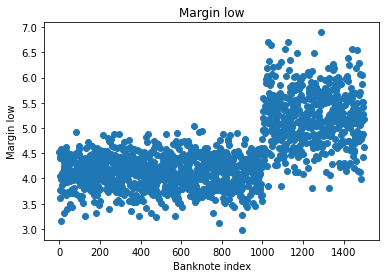

In [12]:
# Analyse des données de marge inférieure
analyse_u(data=billets_data["margin_low"])
plt.title("Margin low")
plt.ylabel("Margin low")
plt.xlabel("Banknote index")
plt.show()

## Margin up<a class="anchor" id="Margin_up"></a>

Moyenne = 3.1514733333333296
Médiane = 3.14
Mode = 3.08
Ecart-type = 0.23181311618653702
Valeur minimale = 2.27
Valeur maximale = 3.91
1er quartile = 2.99
3ème quartile = 3.31
Nombre de valeurs non-nulles = 1500
Valeurs aberrantes :
1029    3.91
1270    3.81
Name: margin_up, dtype: float64
664    2.27
Name: margin_up, dtype: float64


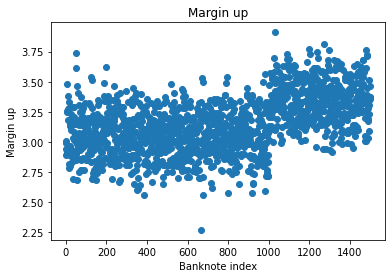

In [13]:
# Analyse des données de marge supérieure
analyse_u(data=billets_data["margin_up"])
plt.title("Margin up")
plt.ylabel("Margin up")
plt.xlabel("Banknote index")
plt.show()

# Analyse bivariée<a class="anchor" id="Analyse_bivariée"></a>

<AxesSubplot:>

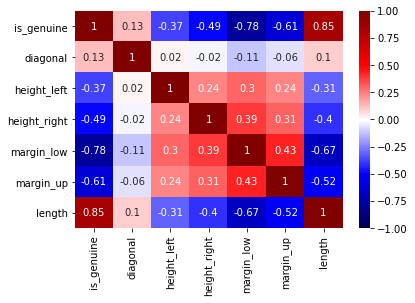

In [14]:
# affiche la matrice de corrélation des données
data_corr = billets_data.dropna()
matrice_corr = data_corr.corr().round(2)
sb.heatmap(data=matrice_corr, vmin=-1, vmax=1, annot=True, cmap="seismic")

En observant la matrice des corrélations on remarque que la données de diagonale est très peu corrélée à toutes les autres données. Les données qui montre le plus fort niveau de corrélation sont margin low et length

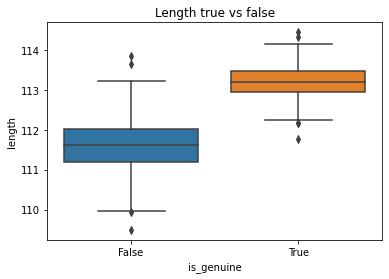

In [15]:
# Boîte à moustache qui comparer la longueur des vrais et des faux billets
ax = sb.boxplot(x=billets_data["is_genuine"], y=billets_data["length"])
ax.set_title("Length true vs false")
plt.show()

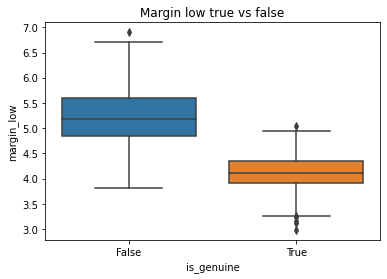

In [16]:
# Boîte à moustache qui comparer la taille de marge inférieure des vrais et des faux billets
ax = sb.boxplot(x=billets_data["is_genuine"], y=billets_data["margin_low"])
ax.set_title("Margin low true vs false")
plt.show()

En comparant les données de longueur et de marge inférieure entre les vrais et les faux billets on remarque une forte différence sur la répartition de ces données.

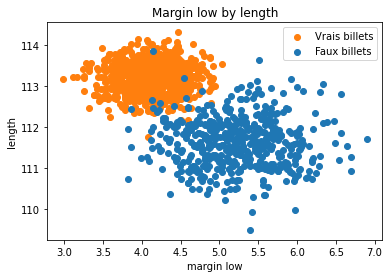

In [17]:
# Différencie vrais et faux billets pour pouvoir les plots séparemment et les labéliser
fbl=billets_data["length"].loc[billets_data.is_genuine==False]
tbl=billets_data["length"].loc[billets_data.is_genuine==True]
fbml=billets_data["margin_low"].loc[billets_data.is_genuine==False]
tbml=billets_data["margin_low"].loc[billets_data.is_genuine==True]

#plt.scatter(billets_data["margin_low"], billets_data["length"], c=billets_data["is_genuine"].values.astype(int), cmap="tab10")
plt.scatter(tbml, tbl, c="tab:orange", label="Vrais billets")
plt.scatter(fbml, fbl, c="tab:blue", label="Faux billets")
plt.xlabel("margin low")
plt.ylabel("length")
plt.title("Margin low by length")
plt.legend()
plt.show()

# Régression linéaire simple<a class="anchor" id="Régression_linéaire"></a>

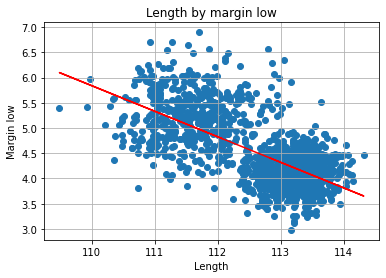

Pvalue:  8.97556709101762e-189
Hypothèse H0 : slope est égale à 0
La pValue est inférieure à 0.5, on rejette donc l'hypothèse H0


In [18]:
# régression linéaire entre length et margin_low
slope, intercept, r_value, p_value, std_err = st.linregress(data_corr.length, data_corr.margin_low)
regression_lineaire = (slope*data_corr.length)+intercept
# affiche le graphique
plt.scatter(data_corr.length, data_corr.margin_low)
plt.plot(data_corr.length, regression_lineaire, color="red")
plt.xlabel("Length")
plt.ylabel("Margin low")
plt.title("Length by margin low")
plt.grid()
plt.show()
print("Pvalue: ",p_value)
print("Hypothèse H0 : slope est égale à 0")
if p_value > 0.5 :
    print("La pValue est supérieure à 0.5, on admet donc l'hypothèse H0")
else :
    print("La pValue est inférieure à 0.5, on rejette donc l'hypothèse H0")

In [19]:
# créé un Dataframe où les NaN sont remplacées par des valeurs calculées par régression linéaire
billets_data_2 =  billets_data.where(billets_data.notnull(),round((billets_data.length*slope)+intercept,2), axis= 0)

In [20]:
# Compare le jeu de données corrigé avec l'original
stats, pvalue = st.ks_2samp(billets_data.margin_low, billets_data_2.margin_low)
print("Hypothèse H0 : Les distributions sont identiques.")
print("pValue :", pvalue)
if pvalue > 0.5 :
    print("La pValue est supérieure à 0.5, on admet donc l'hypothèse H0")
else :
    print("La pValue est inférieure à 0.5, on rejette donc l'hypothèse H0")

Hypothèse H0 : Les distributions sont identiques.
pValue : 0.7516787908604354
La pValue est supérieure à 0.5, on admet donc l'hypothèse H0


Moyenne = 4.119379999999994
Médiane = 4.12
Mode = 4.18
Ecart-type = 0.31752801394465885
Valeur minimale = 2.98
Valeur maximale = 5.04
1er quartile = 3.91
3ème quartile = 4.342499999999999
Nombre de valeurs non-nulles = 1000
Valeurs aberrantes :
664    5.04
Name: margin_low, dtype: float64
125    3.26
390    3.26
571    3.25
477    3.24
10     3.16
788    3.12
897    2.98
Name: margin_low, dtype: float64
pvalue = 0.5190739436757785
La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité


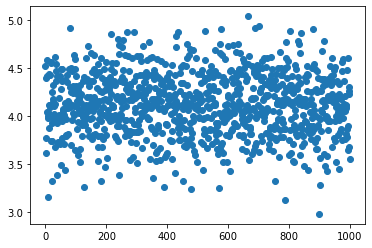

In [21]:
marginlow_true_2 = billets_data_2["margin_low"].loc[billets_data_2["is_genuine"]==True]
analyse_u(data=marginlow_true_2)
# Test de Kolmogorv Smirnov pour tester la normalité
marginlow_true_2_cr = marginlow_true_2
marginlow_true_2_cr -= np.mean(marginlow_true_2_cr)
marginlow_true_2_cr /= np.std(marginlow_true_2_cr)
statistic, pvalue = st.kstest(marginlow_true_2_cr, 'norm')
print("pvalue =", pvalue)
print("La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité")

Moyenne = 5.213460000000001
Médiane = 5.1850000000000005
Mode = 5.14
Ecart-type = 0.5508603476792379
Valeur minimale = 3.82
Valeur maximale = 6.9
1er quartile = 4.84
3ème quartile = 5.59
Nombre de valeurs non-nulles = 500
Valeurs aberrantes :
1290    6.9
Name: margin_low, dtype: float64
Series([], Name: margin_low, dtype: float64)
pvalue = 0.5285634974527781
La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité


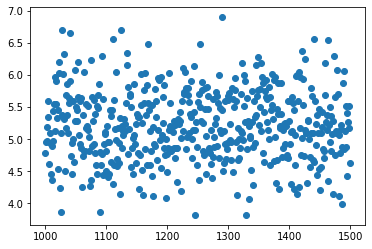

In [22]:
marginlow_false_2 = billets_data_2["margin_low"].loc[billets_data_2["is_genuine"]==False]
analyse_u(data=marginlow_false_2)
# Test de Kolmogorv Smirnov pour tester la normalité
marginlow_false_2_cr = marginlow_false_2
marginlow_false_2_cr -= np.mean(marginlow_false_2_cr)
marginlow_false_2_cr /= np.std(marginlow_false_2_cr)
statistic, pvalue = st.kstest(marginlow_false_2_cr, 'norm')
print("pvalue =", pvalue)
print("La pValue est supérieure à 0.05, on admet donc l'hypothèse H0 de normalité")

Ttest

Hypothèse H0 : Les moyennes des différents groupes sont égales.

In [23]:
# Réalise le test ttest
Fstat, pvalue = st.ttest_ind(marginlow_true_2_cr, marginlow_false_2_cr)
print("Pvalue : ", pvalue)
pvalue<=0.05

Pvalue :  0.999999999999702


False

La Pvalue est supérieure à 0.05, on admet donc l'hypothèse H0.

# Régression linéaire multiple<a class="anchor" id="Régression_linéaire_multiple"></a>

In [24]:
reg_multi = smf.ols('margin_low~margin_up+height_right+height_left+diagonal+length', data=data_corr).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.60e-202
Time:                        13:39:49   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

In [25]:
# Créé un dataframe contenant les données complétées par la regression linéaire multiple
a_prevoir = rows_with_NaN.drop(columns=['is_genuine','margin_low'])
margin_low_prev = reg_multi.predict(a_prevoir)
billets_data_3 = pd.read_csv("billets.csv", sep=";")
billets_data_3["margin_low"] = billets_data_3["margin_low"].fillna(value=round(margin_low_prev,2))

Pour vérifier que les données n'ont pas changées on compare l'ancien jeu de données avec le nouveau qui a été corrigé.

In [26]:
# Compare le jeu de données corrigé avec l'original
stats, pvalue = st.ks_2samp(billets_data.margin_low, billets_data_3.margin_low)
print("Hypothèse H0 : Les distributions sont identiques.")
print("pValue :", pvalue)
if pvalue > 0.5 :
    print("La pValue est supérieure à 0.5, on admet donc l'hypothèse H0")
else :
    print("La pValue est inférieure à 0.5, on rejette donc l'hypothèse H0")

Hypothèse H0 : Les distributions sont identiques.
pValue : 0.7516787908604354
La pValue est supérieure à 0.5, on admet donc l'hypothèse H0


In [27]:
# Importation des données en fichier csv pour les étapes suivantes
billets_data_3.to_csv('billets_data_3.csv', sep=',', index=False)

Grâce à la régression linéaire multiple, les 37 données manquantes pour la colonne Margin low ont pu être remplacées.